In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("customer_conversion.csv")

In [3]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


# Data Cleaning

In [4]:
print("Data set size : ", df.shape)

Data set size :  (45211, 11)


In [5]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [6]:
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [7]:
df['y'].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

In [8]:
#Finding the percentage of the data
print('Percentage for "no": ',((39916) / (39916+5289)) * 100 )
print('Percentage for "yes": ',((5289) / (39916+5289)) * 100 )

Percentage for "no":  88.29996681782988
Percentage for "yes":  11.700033182170113


In [9]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [10]:
df.duplicated().sum()

6

In [11]:
df = df.drop_duplicates()

In [12]:
df.duplicated().sum()

0

In [13]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [14]:
print(df['job'].unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']


In [15]:
print(df['marital'].unique())

['married' 'single' 'divorced']


In [16]:
print(df['education_qual'].unique())

['tertiary' 'secondary' 'unknown' 'primary']


In [17]:
print(df['call_type'].unique())

['unknown' 'cellular' 'telephone']


In [18]:
print(df['mon'].unique())

['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']


In [19]:
print(df['prev_outcome'].unique())

['unknown' 'failure' 'other' 'success']


In [20]:
print(df['y'].unique())

['no' 'yes']


In [21]:
df['target'] = df["y"].map({"yes":1 , "no": 0})

C:\Users\avani\AppData\Local\Temp\ipykernel_22900\934909112.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = df["y"].map({"yes":1 , "no": 0})


In [22]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no,0
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no,0
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes,1
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes,1
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes,1
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no,0


In [23]:
df.age.value_counts()

age
32    2084
31    1996
33    1972
34    1929
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: count, Length: 77, dtype: int64

In [24]:
df.groupby('age')['target'].mean()

age
18    0.583333
19    0.314286
20    0.300000
21    0.278481
22    0.310078
        ...   
90    1.000000
92    1.000000
93    1.000000
94    0.000000
95    0.500000
Name: target, Length: 77, dtype: float64

In [25]:
df.job.value_counts()

job
blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

In [26]:
df.groupby('job')['target'].mean()

job
admin.           0.122050
blue-collar      0.072765
entrepreneur     0.082717
housemaid        0.087903
management       0.137570
retired          0.227915
self-employed    0.118429
services         0.088851
student          0.286780
technician       0.110585
unemployed       0.155027
unknown          0.118056
Name: target, dtype: float64

In [27]:
df['job'] =df['job'].replace('unknown',np.nan)

C:\Users\avani\AppData\Local\Temp\ipykernel_22900\567193304.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['job'] =df['job'].replace('unknown',np.nan)


In [28]:
df.job.isnull().sum()

288

In [29]:
df=df.dropna(subset=['job'])

In [30]:
df.job.isnull().sum()

0

# Marital Status

In [31]:
df.marital.value_counts()

marital
married     27007
single      12720
divorced     5190
Name: count, dtype: int64

In [32]:
df.groupby('marital')['target'].mean()

marital
divorced    0.119653
married     0.101233
single      0.149371
Name: target, dtype: float64

# Educational Qualification

In [33]:
df.education_qual.value_counts()

education_qual
secondary    23128
tertiary     13260
primary       6799
unknown       1730
Name: count, dtype: int64

In [34]:
df.groupby('education_qual')['target'].mean()

education_qual
primary      0.086483
secondary    0.105543
tertiary     0.150226
unknown      0.135260
Name: target, dtype: float64

In [35]:
print('Percentage for "Unknown": ',((1730) / (23202+13301+6851+1730)) * 100 )

Percentage for "Unknown":  3.8372815189424188


In [36]:
df['education_qual'] =df['education_qual'].replace('unknown',np.nan)

C:\Users\avani\AppData\Local\Temp\ipykernel_22900\2160037322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['education_qual'] =df['education_qual'].replace('unknown',np.nan)


In [37]:
#checking for null values
df.education_qual.isnull().sum()

1730

In [38]:
#droping the null values
df = df. dropna(subset=['education_qual'])

In [39]:
df.education_qual.isnull().sum()

0

# Call Type

In [40]:
df.call_type.value_counts()

call_type
cellular     28210
unknown      12283
telephone     2694
Name: count, dtype: int64

In [41]:
df.groupby('call_type')['target'].mean()

call_type
cellular     0.147572
telephone    0.129918
unknown      0.041358
Name: target, dtype: float64

In [42]:
print('Percentage for "Unknown": ',((12283) / (29285+13020+12283)) * 100 )

Percentage for "Unknown":  22.501282333113505


# Day

In [43]:
df.day.value_counts()

day
20    2628
18    2227
21    1961
17    1872
6     1817
5     1796
14    1784
8     1758
7     1739
28    1739
29    1661
19    1656
15    1649
12    1542
13    1529
9     1483
30    1481
11    1397
4     1372
16    1331
2     1243
27    1072
3     1039
26     994
23     900
22     875
25     810
31     597
10     504
24     426
1      305
Name: count, dtype: int64

In [44]:
df.groupby('day')['target'].mean()

day
1     0.278689
2     0.139179
3     0.166506
4     0.160350
5     0.114143
6     0.094111
7     0.086832
8     0.105802
9     0.113284
10    0.224206
11    0.121689
12    0.153696
13    0.152387
14    0.109305
15    0.141298
16    0.133734
17    0.090812
18    0.100584
19    0.069444
20    0.070396
21    0.098929
22    0.162286
23    0.131111
24    0.143192
25    0.155556
26    0.105634
27    0.125933
28    0.075331
29    0.074052
30    0.173531
31    0.073702
Name: target, dtype: float64

# Month

In [45]:
df.mon.value_counts()

mon
may    13191
jul     6600
aug     6035
jun     4978
nov     3842
apr     2820
feb     2533
jan     1318
oct      690
sep      532
mar      448
dec      200
Name: count, dtype: int64

In [46]:
df.groupby('mon')['target'].mean()

mon
apr    0.192553
aug    0.109196
dec    0.465000
feb    0.165022
jan    0.100152
jul    0.088788
jun    0.105062
mar    0.537946
may    0.067319
nov    0.101510
oct    0.430435
sep    0.471805
Name: target, dtype: float64

# Duration

In [47]:
df.dur.value_counts()

dur
124     176
90      172
89      172
114     172
122     169
       ... 
1327      1
1331      1
1608      1
1833      1
1556      1
Name: count, Length: 1558, dtype: int64

In [48]:
df.groupby('dur')['target'].mean()

dur
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
3366    0.0
3422    0.0
3785    0.0
3881    1.0
4918    0.0
Name: target, Length: 1558, dtype: float64

# Number of Calls

In [49]:
df.num_calls.value_counts()

num_calls
1     16740
2     11936
3      5277
4      3397
5      1703
6      1234
7       696
8       516
9       307
10      255
11      190
12      149
13      123
14       85
15       81
16       75
17       65
18       47
19       43
20       42
21       33
25       22
22       20
24       20
23       20
28       16
29       13
26       12
31       11
32        9
27        9
30        8
33        6
34        4
36        4
38        3
35        3
43        2
50        2
41        2
51        1
37        1
46        1
55        1
58        1
39        1
44        1
Name: count, dtype: int64

In [50]:
df.groupby('num_calls')['target'].mean()

num_calls
1     0.145221
2     0.110841
3     0.111237
4     0.088902
5     0.079859
6     0.072123
7     0.064655
8     0.058140
9     0.065147
10    0.050980
11    0.078947
12    0.026846
13    0.048780
14    0.047059
15    0.049383
16    0.026667
17    0.076923
18    0.000000
19    0.000000
20    0.023810
21    0.030303
22    0.000000
23    0.000000
24    0.050000
25    0.000000
26    0.000000
27    0.000000
28    0.000000
29    0.076923
30    0.000000
31    0.000000
32    0.111111
33    0.000000
34    0.000000
35    0.000000
36    0.000000
37    0.000000
38    0.000000
39    0.000000
41    0.000000
43    0.000000
44    0.000000
46    0.000000
50    0.000000
51    0.000000
55    0.000000
58    0.000000
Name: target, dtype: float64

# Previous Outcome

In [51]:
df.prev_outcome.value_counts()

prev_outcome
unknown    35280
failure     4709
other       1774
success     1424
Name: count, dtype: int64

In [52]:
df.groupby('prev_outcome')['target'].mean()

prev_outcome
failure    0.124655
other      0.165163
success    0.643961
unknown    0.091383
Name: target, dtype: float64

In [53]:
print('Percentage for "Unknown": ',((35280) / (35280+4709+1774+1424)) * 100 )

Percentage for "Unknown":  81.69124968161715


# Target Y

In [54]:
df.y.value_counts()

y
no     38166
yes     5021
Name: count, dtype: int64

In [55]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43187 entries, 0 to 45210
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             43187 non-null  int64 
 1   job             43187 non-null  object
 2   marital         43187 non-null  object
 3   education_qual  43187 non-null  object
 4   call_type       43187 non-null  object
 5   day             43187 non-null  int64 
 6   mon             43187 non-null  object
 7   dur             43187 non-null  int64 
 8   num_calls       43187 non-null  int64 
 9   prev_outcome    43187 non-null  object
 10  y               43187 non-null  object
 11  target          43187 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 4.3+ MB


# Checking for Outliers

# Age

<Axes: xlabel='age'>

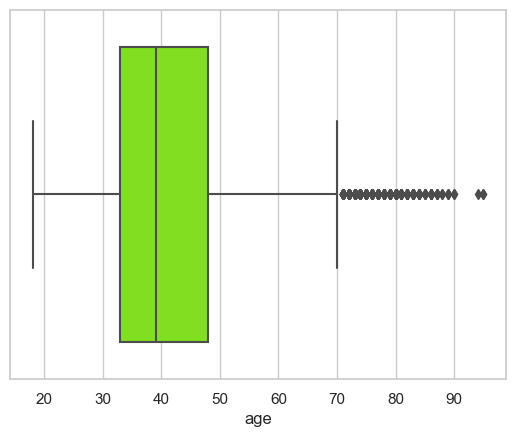

In [56]:
sns.set(style="whitegrid")
sns.boxplot(x=df['age'], color='Chartreuse')

In [57]:
q1,q3=np.percentile(df["age"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper age bound:",upper,"Lower age bound :", lower)

Upper age bound: 70.5 Lower age bound : 10.5


In [58]:
df.age = df.age.clip(10.5,70.5)

In [59]:
df.age.describe()

count    43187.000000
mean        40.702549
std         10.305239
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         70.500000
Name: age, dtype: float64

<Axes: xlabel='age'>

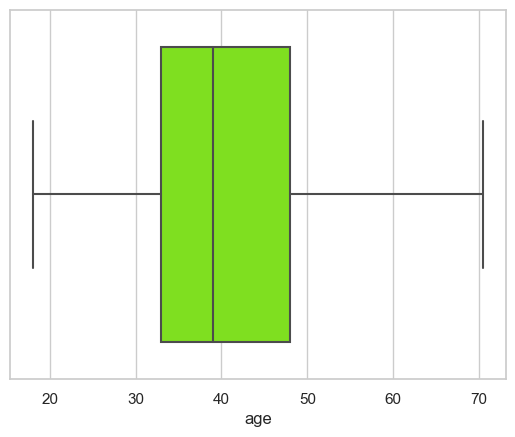

In [60]:
sns.set(style="whitegrid")
sns.boxplot(x=df['age'], color='Chartreuse')

# Day

<Axes: xlabel='day'>

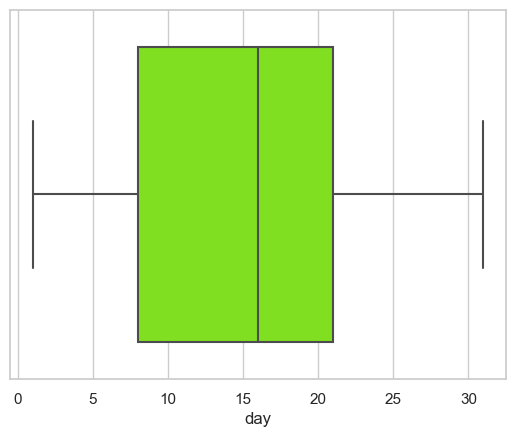

In [61]:
sns.set(style="whitegrid")
sns.boxplot(x=df['day'], color='Chartreuse')

In [62]:
q1,q3=np.percentile(df["day"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper bound:",upper,"Lower bound :", lower)

Upper bound: 40.5 Lower bound : -11.5


In [63]:
df.day.describe()

count    43187.000000
mean        15.809896
std          8.305826
min          1.000000
25%          8.000000
50%         16.000000
75%         21.000000
max         31.000000
Name: day, dtype: float64

# Duration

<Axes: >

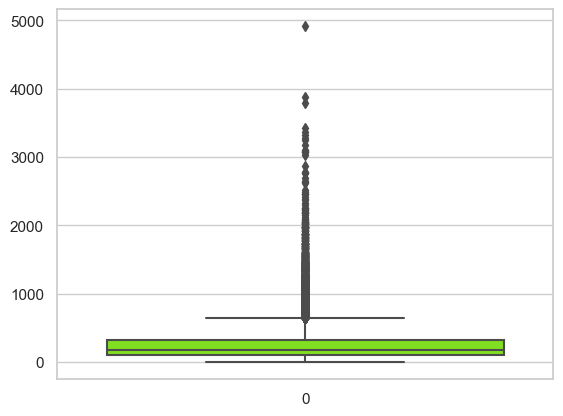

In [64]:
sns.set(style="whitegrid")
sns.boxplot(df['dur'], color='Chartreuse')

In [65]:
q1,q3=np.percentile(df["dur"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper bound:",upper,"Lower bound :", lower)

Upper bound: 640.5 Lower bound : -219.5


In [66]:
df.dur = df.dur.clip(-219.5,640.5)

In [67]:
df.dur.describe()

count    43187.000000
mean       234.788038
std        176.240001
min          0.000000
25%        103.000000
50%        180.000000
75%        318.000000
max        640.500000
Name: dur, dtype: float64

<Axes: >

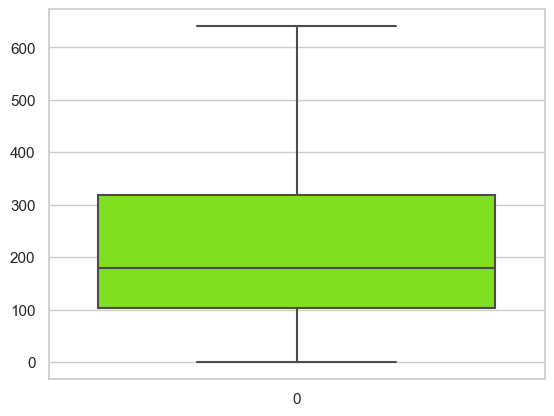

In [68]:
sns.set(style="whitegrid")
sns.boxplot(df['dur'], color='Chartreuse')

# Number of Calls

<Axes: >

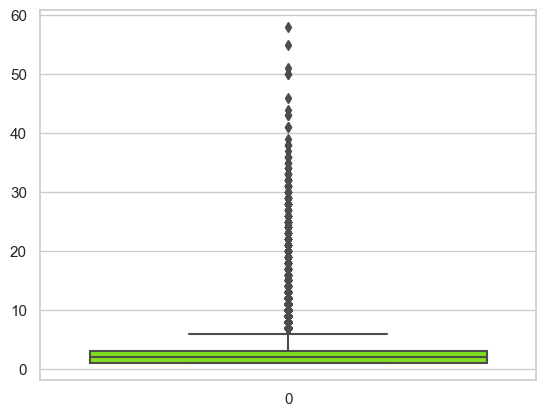

In [69]:
sns.set(style="whitegrid")
sns.boxplot(df['num_calls'], color='Chartreuse')

In [70]:
q1,q3=np.percentile(df["num_calls"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper bound:",upper,"Lower bound :", lower)

Upper bound: 6.0 Lower bound : -2.0


In [71]:
df.num_calls = df.num_calls.clip(-2,6.0)

In [72]:
df.num_calls.describe()

count    43187.000000
mean         2.393081
std          1.598892
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: num_calls, dtype: float64

<Axes: >

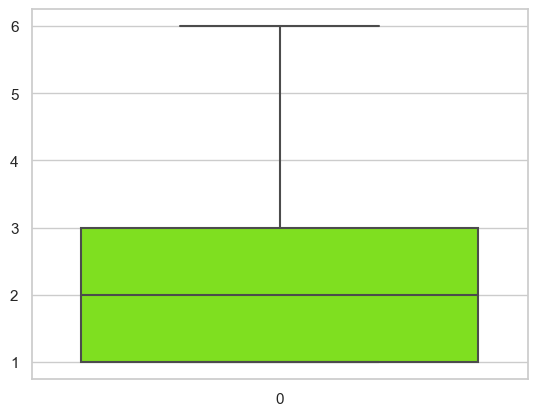

In [73]:
sns.set(style="whitegrid")
sns.boxplot(df['num_calls'], color='Chartreuse')

# Features vs Target

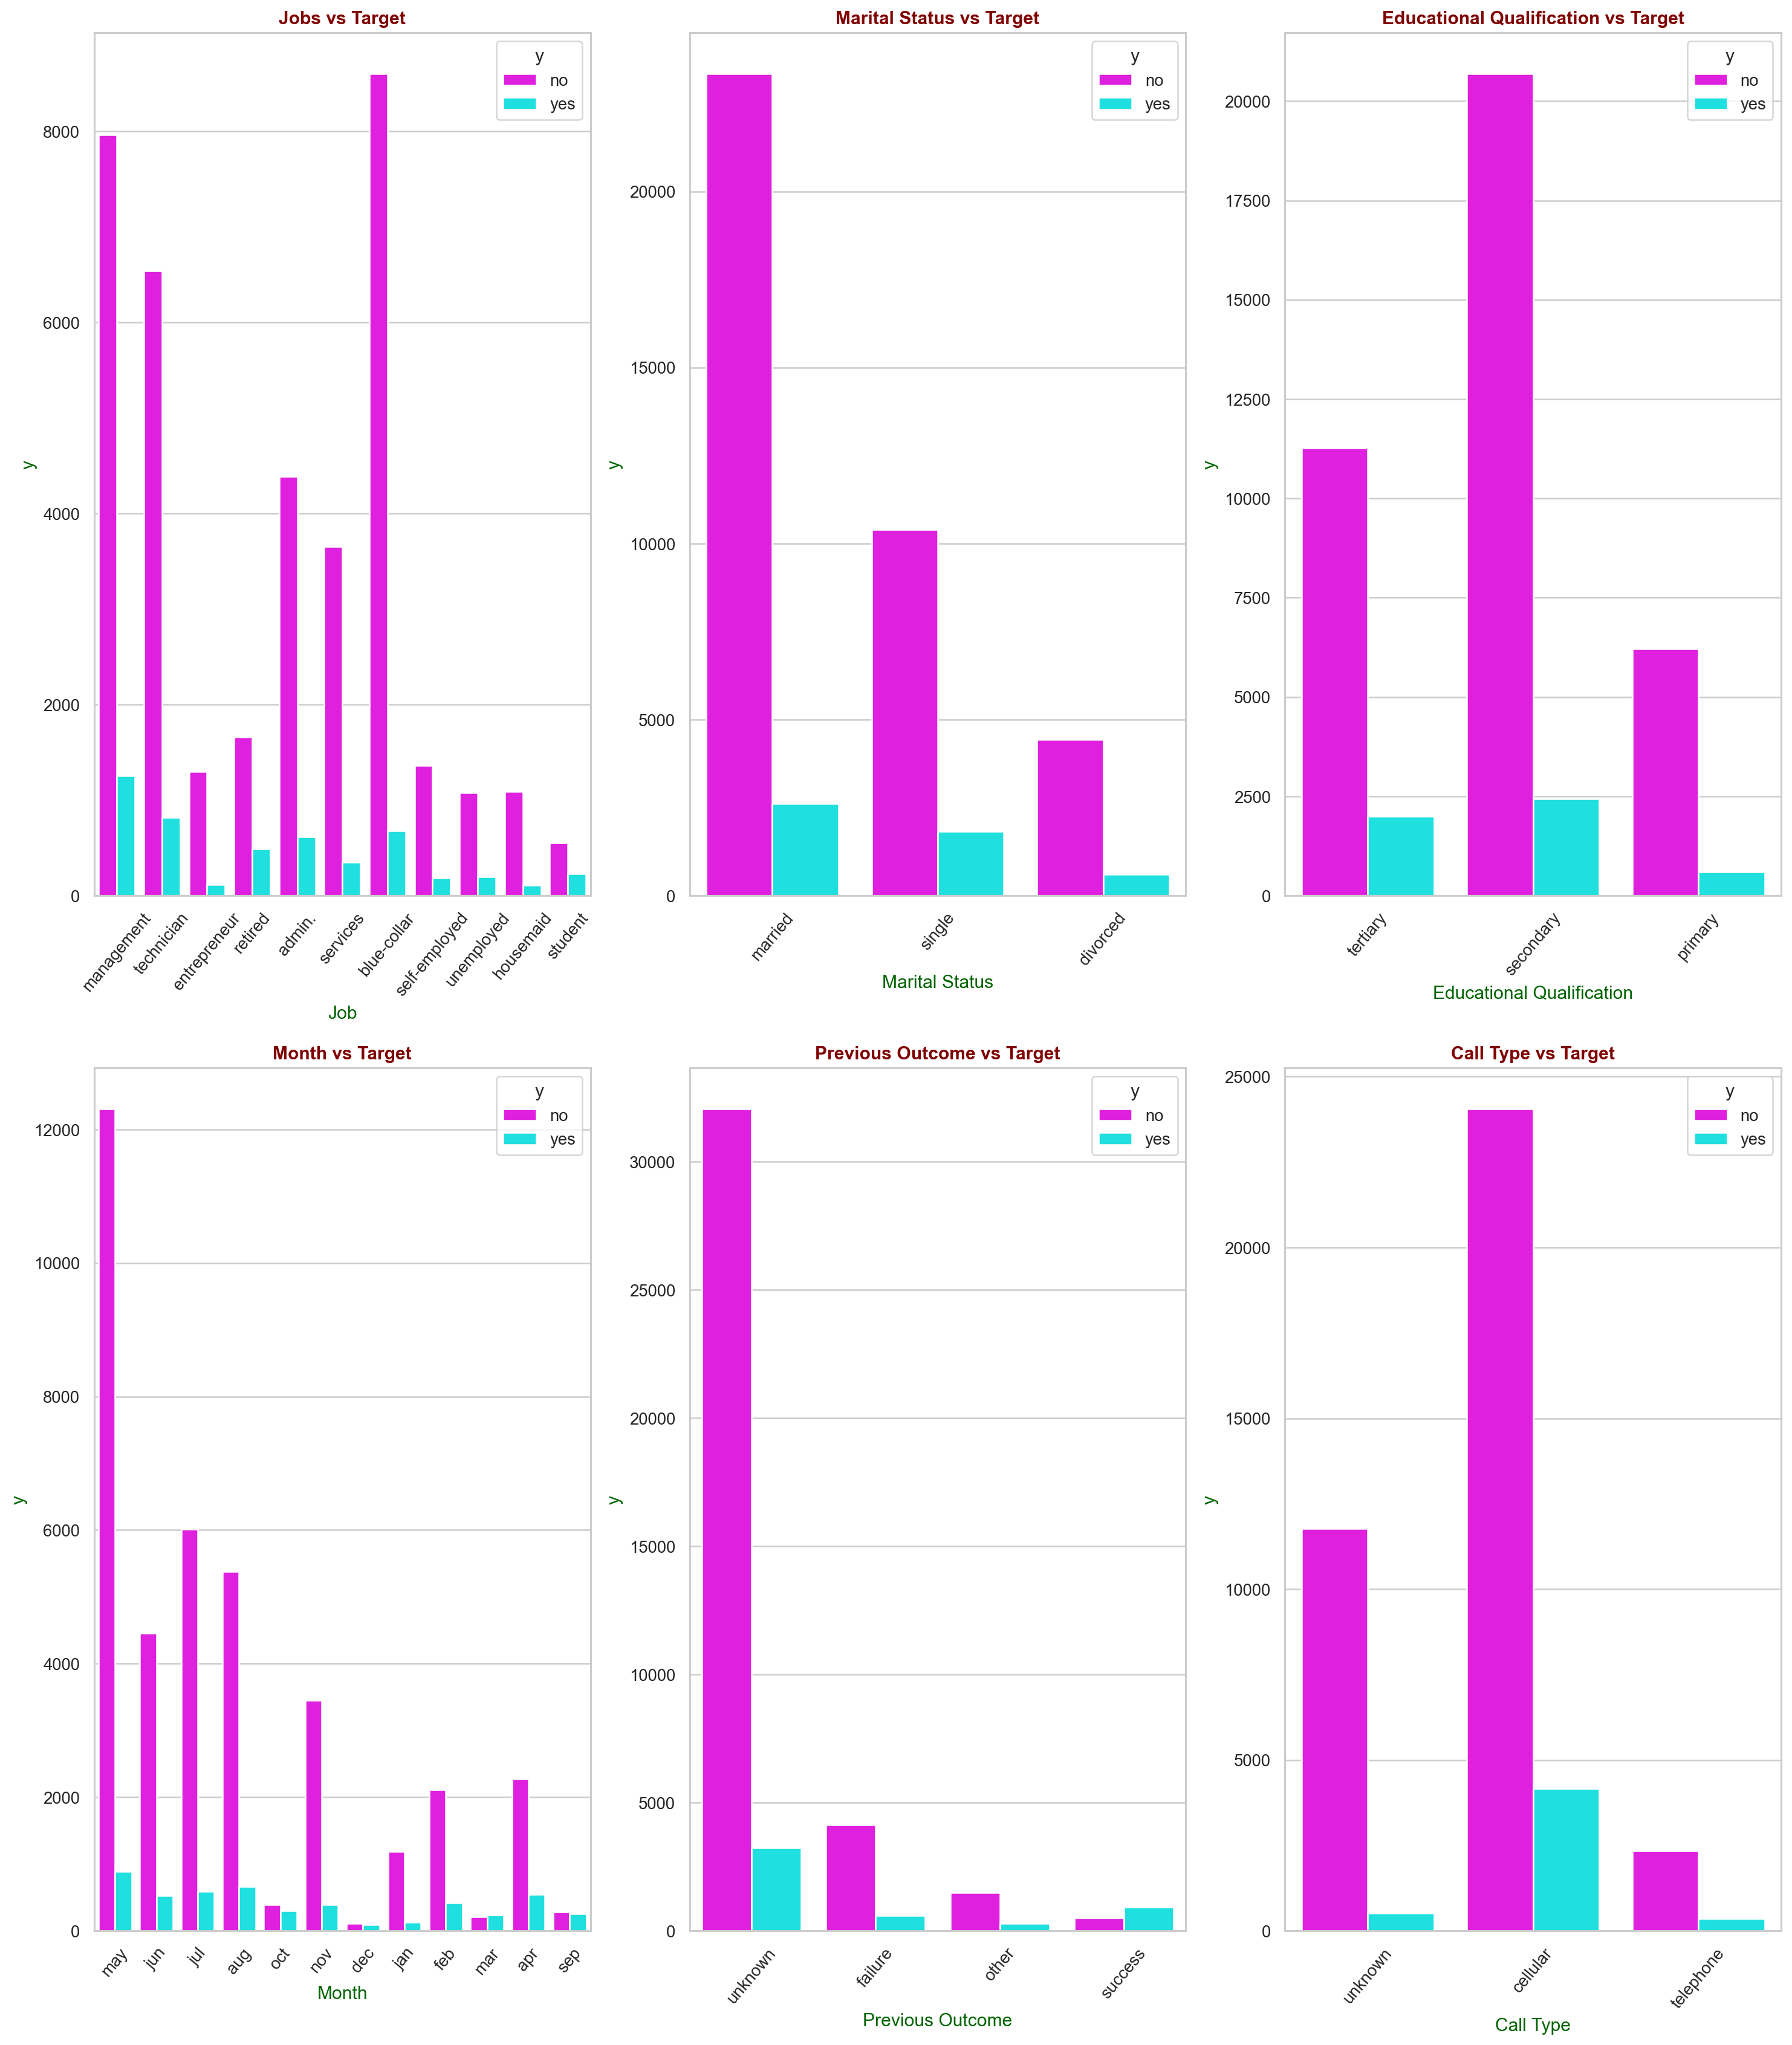

In [74]:
plt.figure(figsize=(20,35), dpi=180)
#plt.suptitle("Categorical Data Vs Target", fontsize=20, fontweight='bold', color='maroon')
#Jobs vs Target
plt.subplot(3,3,1)
my_colors = ['Magenta', 'cyan']
sns.countplot(x='job',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Jobs vs Target', fontweight='bold', color='maroon')
plt.xlabel('Job', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#Marital Status vs Target
plt.subplot(3,3,2)
my_colors = ['Magenta', 'cyan']
sns.countplot(x='marital',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Marital Status vs Target', fontweight='bold', color='maroon')
plt.xlabel('Marital Status', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#Educational Qualification vs Target
plt.subplot(3,3,3)
my_colors = ['Magenta', 'cyan']
sns.countplot(x='education_qual',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Educational Qualification vs Target', fontweight='bold', color='maroon')
plt.xlabel('Educational Qualification', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#Month vs Target
plt.subplot(3,3,4)
my_colors = ['Magenta', 'cyan']
sns.countplot(x='mon',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Month vs Target', fontweight='bold', color='maroon' )
plt.xlabel('Month', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#Previous Outcome vs Target
plt.subplot(3,3,5)
my_colors = ['Magenta', 'cyan']
sns.countplot(x='prev_outcome',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Previous Outcome vs Target', fontweight='bold', color='maroon' )
plt.xlabel('Previous Outcome', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#Call Type vs Target
plt.subplot(3,3,6)
my_colors = ['Magenta', 'cyan']
sns.countplot(x='call_type',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Call Type vs Target', fontweight='bold', color='maroon')
plt.xlabel('Call Type', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

plt.show()

# Numerical Variable vs Target

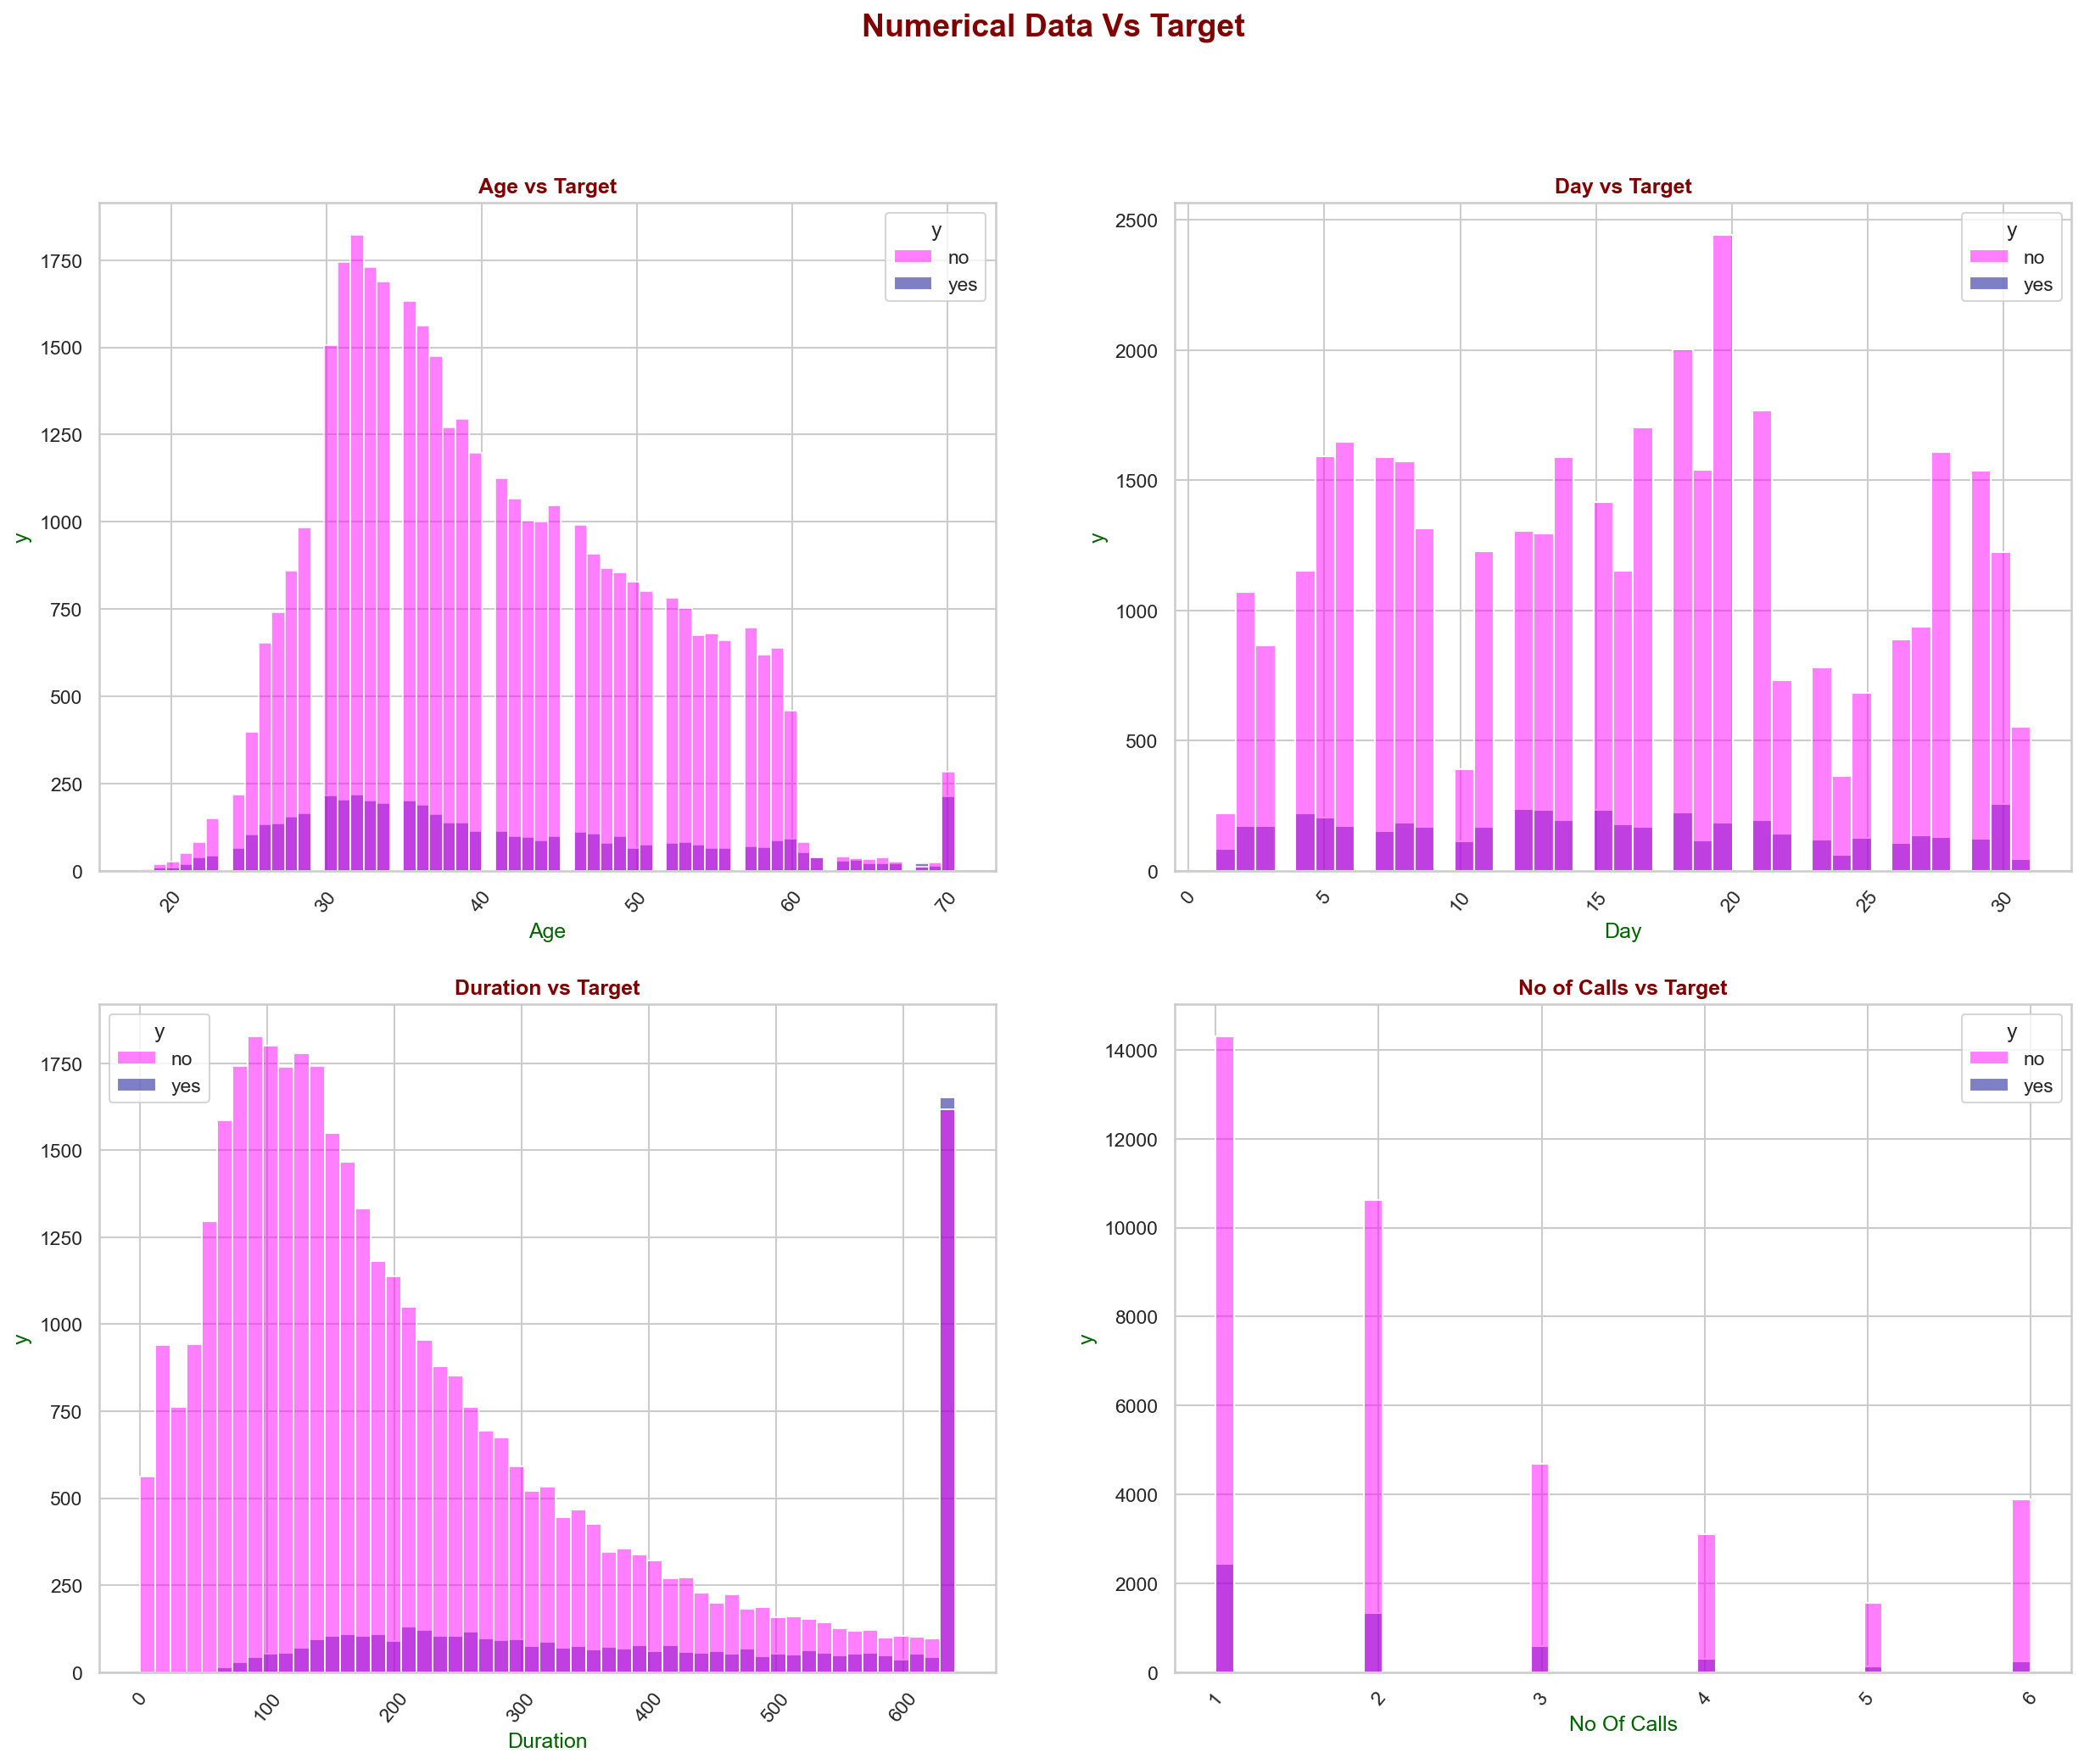

In [75]:
plt.figure(figsize=(20, 15), dpi=150)
#sub title to show title for overall plot 
plt.suptitle("Numerical Data Vs Target", fontsize=18,  fontweight='bold', color='maroon') 

#Age vs Target
plt.subplot(2,2,1)
my_colors = ['Magenta', 'DarkBlue']
sns.histplot(x='age',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Age vs Target', fontweight='bold', color='maroon' )
plt.xlabel('Age', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')
#df[['age','target']].corr()

#Day vs Target
plt.subplot(2,2,2)
my_colors = ['Magenta', 'DarkBlue']
sns.histplot(x='day',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Day vs Target', fontweight='bold', color='maroon' )
plt.xlabel('Day', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')
#df[['day','target']].corr()

#Duration vs Target
plt.subplot(2,2,3)
my_colors = ['Magenta', 'DarkBlue']
sns.histplot(x='dur',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Duration vs Target', fontweight='bold', color='maroon' )
plt.xlabel('Duration', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#No of Calls vs Target
plt.subplot(2,2,4)
my_colors = ['Magenta', 'DarkBlue']
sns.histplot(x='num_calls',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('No of Calls vs Target', fontweight='bold', color='maroon' )
plt.xlabel('No Of Calls', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

plt.show()


# Encoding

In [76]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y', 'target'],
      dtype='object')

# Job

In [77]:
df['job']=df['job'].map({'blue-collar':1,'entrepreneur':2,'services':3,'housemaid':4,'technician':5,'self-employed':6,'admin.':7,'management':8, 'unemployed':9, 'retired': 10, 'student' : 11})   
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,8,married,tertiary,unknown,5,may,261.0,1,unknown,no,0
1,44.0,5,single,secondary,unknown,5,may,151.0,1,unknown,no,0
2,33.0,2,married,secondary,unknown,5,may,76.0,1,unknown,no,0
5,35.0,8,married,tertiary,unknown,5,may,139.0,1,unknown,no,0
6,28.0,8,single,tertiary,unknown,5,may,217.0,1,unknown,no,0


# Marital Status

In [78]:
df['marital'] =df['marital'].map({'married': 1, 'divorced': 2, 'single' : 3})
df.head(3)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,8,1,tertiary,unknown,5,may,261.0,1,unknown,no,0
1,44.0,5,3,secondary,unknown,5,may,151.0,1,unknown,no,0
2,33.0,2,1,secondary,unknown,5,may,76.0,1,unknown,no,0


# Educational Qualification

In [79]:
df['education_qual'] = df['education_qual'].map({'primary': 1, 'secondary': 2, 'tertiary' :3})
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,8,1,3,unknown,5,may,261.0,1,unknown,no,0
1,44.0,5,3,2,unknown,5,may,151.0,1,unknown,no,0
2,33.0,2,1,2,unknown,5,may,76.0,1,unknown,no,0
5,35.0,8,1,3,unknown,5,may,139.0,1,unknown,no,0
6,28.0,8,3,3,unknown,5,may,217.0,1,unknown,no,0


# Month

In [80]:
df['mon']=df['mon'].map({'may': 1, 'jul' : 2, 'jan': 3, 'nov': 4, 'jun' : 5, 'aug' : 6, 'feb' : 7, 'apr' : 8, 'oct' : 9, 'dec' : 10 , 'sep': 11, 'mar': 12})
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,8,1,3,unknown,5,1,261.0,1,unknown,no,0
1,44.0,5,3,2,unknown,5,1,151.0,1,unknown,no,0
2,33.0,2,1,2,unknown,5,1,76.0,1,unknown,no,0
5,35.0,8,1,3,unknown,5,1,139.0,1,unknown,no,0
6,28.0,8,3,3,unknown,5,1,217.0,1,unknown,no,0


# Call Type

In [81]:
df['call_type'] = df['call_type'].map({'unknown': 1, 'telephone' : 2, 'cellular' : 3})
df.head(3)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,8,1,3,1,5,1,261.0,1,unknown,no,0
1,44.0,5,3,2,1,5,1,151.0,1,unknown,no,0
2,33.0,2,1,2,1,5,1,76.0,1,unknown,no,0


# Previous Outcome

In [82]:
df['prev_outcome']=df['prev_outcome'].map({'unknown' : 1, 'failure' : 2, 'other' : 3, 'success': 4})
df.head(3)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,8,1,3,1,5,1,261.0,1,1,no,0
1,44.0,5,3,2,1,5,1,151.0,1,1,no,0
2,33.0,2,1,2,1,5,1,76.0,1,1,no,0


# Target Selection

In [83]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y', 'target'],
      dtype='object')

In [84]:
x = df[['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon', 'dur', 'num_calls', 'prev_outcome']].values
y=df['target'].values

In [85]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 3 )

# Balancing

In [86]:
#Balancing the data
from imblearn.combine import SMOTEENN 
smt = SMOTEENN(sampling_strategy='all') 
x_train_smt, y_train_smt = smt.fit_resample(x_train, y_train)

In [87]:

print(len(x_train_smt))
print(len(y_train_smt))

52561
52561


# Scaling

In [88]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_smt)
x_test_scaled = scaler.transform(x_test)

# Logistic Regression

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

lr = LogisticRegression()

lr.fit(x_train_scaled,y_train_smt)
lr.score(x_test_scaled,y_test)

0.763834220884464

In [91]:
y_pred=lr.predict_proba(x_test_scaled)
y_pred

array([[0.86382576, 0.13617424],
       [0.9906854 , 0.0093146 ],
       [0.88376114, 0.11623886],
       ...,
       [0.23787957, 0.76212043],
       [0.13967622, 0.86032378],
       [0.97040278, 0.02959722]])

In [92]:
log_reg_auroc = roc_auc_score(y_test,y_pred[:,1])
print("AUROC score for logistic regression  :  ",round(log_reg_auroc,2))

AUROC score for logistic regression  :   0.88


# Decisison Tree

In [93]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import roc_auc_score

In [94]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import roc_auc_score 
dt = DecisionTreeClassifier() 
dt.fit(x_train_smt,y_train_smt) 
print("Decision Tree Score : ", dt.score(x_train_smt,y_train_smt)) 
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, dt.predict_proba(x_test)[:, 1]))

Decision Tree Score :  1.0
AUROC on the sampled dataset :  0.7914132083511988


In [95]:

from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score #this will help me to do cross- validation
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20]:
  dt = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(x_train_smt, y_train_smt) # the model is trained
  trainAccuracy = accuracy_score(y_train_smt, dt.predict(x_train_smt)) # this is useless information - i am showing to prove a point
  dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, x_test_scaled, y_test, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.7834706341203554  Cross val score :  0.8850428897901377
Depth  :  2  Training Accuracy :  0.8098780464603033  Cross val score :  0.8936105210076821
Depth  :  3  Training Accuracy :  0.8668214075074675  Cross val score :  0.895462775202781
Depth  :  4  Training Accuracy :  0.9054241738170887  Cross val score :  0.8955789182867688
Depth  :  5  Training Accuracy :  0.9140046802762505  Cross val score :  0.8970838161452299
Depth  :  6  Training Accuracy :  0.929168014307186  Cross val score :  0.8947672578430111
Depth  :  7  Training Accuracy :  0.9378436483324137  Cross val score :  0.8933782348397065
Depth  :  8  Training Accuracy :  0.944464526930614  Cross val score :  0.8914103740182826
Depth  :  9  Training Accuracy :  0.9515420178459314  Cross val score :  0.8903676344362902
Depth  :  10  Training Accuracy :  0.9620821521660546  Cross val score :  0.8911795631088795
Depth  :  20  Training Accuracy :  0.9990106733129126  Cross val score :  0.873813

# Random Forest

In [96]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=2,n_estimators=100,max_features="sqrt")    #max_depth=log(no of features)
rf.fit(x_train, y_train)
y_pred= rf.predict(x_test)

In [97]:
#doing cross validation to get best value of max _depth to prevent overfitted model 
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestClassifier
for depth in [1,2,3,4,5,6,7,8,9,10]:
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  rf.fit(x_train, y_train) # the model is trained
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # a fresh model which is not trained yet
  valAccuracy = cross_val_score(rf, x_train, y_train, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.9990106733129126  Cross val score :  0.8834119714385553
Depth  :  2  Training Accuracy :  0.9990106733129126  Cross val score :  0.8849170784601756
Depth  :  3  Training Accuracy :  0.9990106733129126  Cross val score :  0.8908506339678739
Depth  :  4  Training Accuracy :  0.9990106733129126  Cross val score :  0.8949028161731988
Depth  :  5  Training Accuracy :  0.9990106733129126  Cross val score :  0.8968420765956877
Depth  :  6  Training Accuracy :  0.9990106733129126  Cross val score :  0.8995628215194614
Depth  :  7  Training Accuracy :  0.9990106733129126  Cross val score :  0.9029203666631191
Depth  :  8  Training Accuracy :  0.9990106733129126  Cross val score :  0.9043386513842882
Depth  :  9  Training Accuracy :  0.9990106733129126  Cross val score :  0.9045701412066969
Depth  :  10  Training Accuracy :  0.9990106733129126  Cross val score :  0.9044254234064073


Models are tested, below are the AUROC value of each model

Logistic Regression - AUROC Score is 0.88
KNN - AUROC Score is 0.895
Decision Tree - AUROC Score is 0.897
XG Boost - AUROC Score is 0.899
Random Forest - AUROC Score is 0.904
Hence Random Forest is giving the good AUROC Score of 0.904, so Random Forest is the best model for customer convertion prediction